In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('USA_Housing.csv')

In [ ]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [ ]:
df.shape

(5000, 7)

In [ ]:
df.drop(['Address'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

####Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()

In [ ]:
ln.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Training Accuracy:', ln.score(X_train, y_train)*100)
print('Testing Accuracy:', ln.score(X_test, y_test)*100)

Training Accuracy: 91.7146624876573
Testing Accuracy: 92.11719165553795


####Fit the line graph

In [ ]:
pred=ln.predict(X_test)

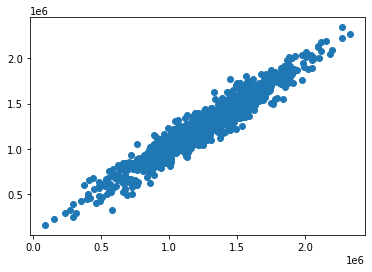

In [ ]:
plt.scatter(y_test,pred)

####Accuracy of regression

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(r2)

0.9211719165553796


####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [ ]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
print('Training Accuracy:', regressor.score(X_train, y_train)*100)
print('Testing Accuracy:', regressor.score(X_test, y_test)*100)

Training Accuracy: 98.36620094203874
Testing Accuracy: 88.21691043866365


In [ ]:
pred=regressor.predict(X_test)

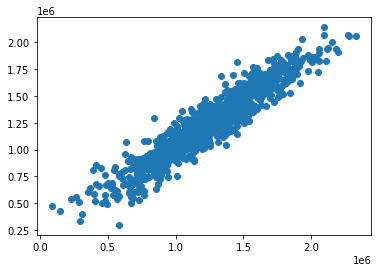

In [ ]:
plt.scatter(y_test,pred)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
print(r2)

0.881753941321747


####Support Vector Regressor

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
regr.predict(X_test[:1])

array([1231881.83289332])

In [ ]:
regr.score(X_train, y_train, sample_weight=None)

0.000895950427783454

####KNN Regressor

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 337593.8856492756
RMSE value for k=  2 is: 290177.54188808217
RMSE value for k=  3 is: 271967.9737091523
RMSE value for k=  4 is: 263353.107100657
RMSE value for k=  5 is: 256279.5529946435
RMSE value for k=  6 is: 253384.92209693123
RMSE value for k=  7 is: 250722.74647935532
RMSE value for k=  8 is: 249767.6038236631
RMSE value for k=  9 is: 248206.67797910795
RMSE value for k=  10 is: 246874.73353954434
RMSE value for k=  11 is: 246127.07710901008
RMSE value for k=  12 is: 243764.5522986948
RMSE value for k=  13 is: 243041.20701578772
RMSE value for k=  14 is: 242813.2120428299
RMSE value for k=  15 is: 242896.4037314072
RMSE value for k=  16 is: 241841.30728794957
RMSE value for k=  17 is: 241297.88055900484
RMSE value for k=  18 is: 240887.25078284377
RMSE value for k=  19 is: 241164.09781584935
RMSE value for k=  20 is: 240626.21038407896


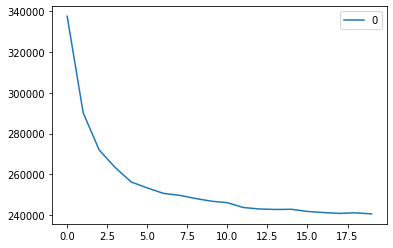

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

####Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
print('Train Accuracy:',dt.score(X_train,y_train)*100)
print('Test Accuracy:',dt.score(X_test,y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 76.3656963698415


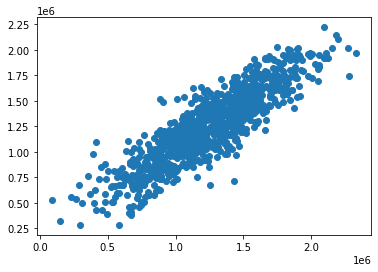

In [ ]:
pred=dt.predict(X_test)
plt.scatter(y_test,pred)

####XGBoost Regressor

In [ ]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

In [ ]:
xgb.fit(X_train,y_train)

[11:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print('Train Accuracy:',xgb.score(X_train,y_train)*100)
print('Test Accuracy:',xgb.score(X_test,y_test)*100)

Train Accuracy: 92.74493500040943
Test Accuracy: 90.39577918226733


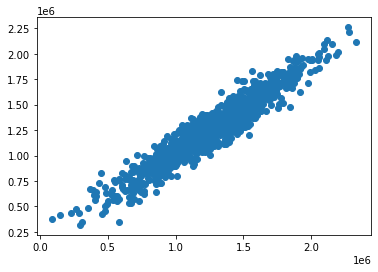

In [ ]:
pred=xgb.predict(X_test)
plt.scatter(y_test,pred)

####MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()
mlp.fit(X_train,y_train)

MLPRegressor()

In [ ]:
print('Train Accuracy:',mlp.score(X_train,y_train)*100)
print('Test Accuracy:',mlp.score(X_test,y_test)*100)

Train Accuracy: 50.33890227104625
Test Accuracy: 49.05692830642987


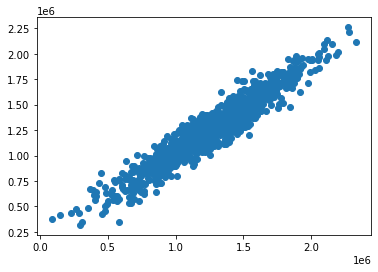

In [ ]:
pred=xgb.predict(X_test)
plt.scatter(y_test,pred)